In this notebook, I make plots to support the understanding of the theory section.

In [4]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

# Risk Measures

## Figure 1: Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR)

Suppose we have some distribution of financial returns with the following characteristics.

In [70]:
mu = 0.09
sd = 0.15
beta = 0.80

Then we can plot the distribution.

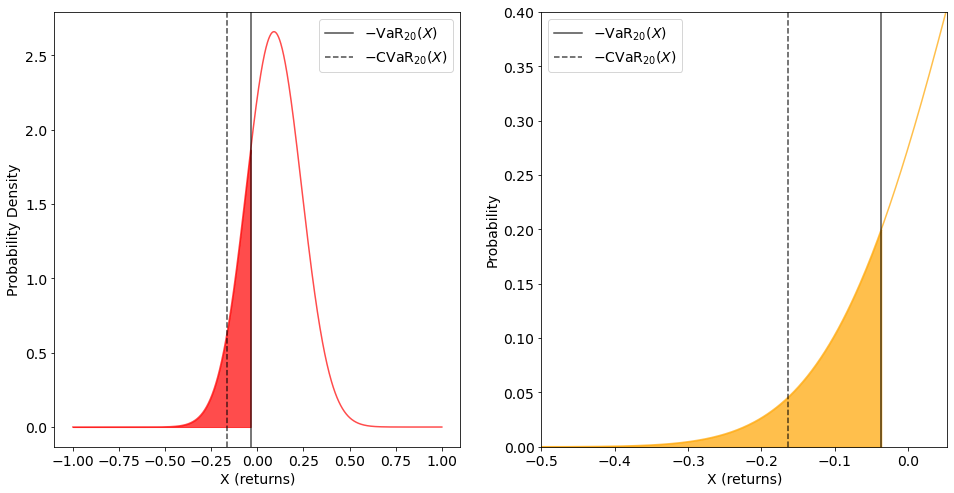

In [119]:
# Specify fontsizes
fontSizeAxis = 14
fontSizeLegends = 14
fontSizeTicks = 14

# Calculate x-position of VaR and CVaR
VaR = ss.norm.ppf(1-beta, loc=mu, scale=sd)
CVaR = mu - sd*(ss.norm.pdf(ss.norm.cdf(1-beta)))/(1-beta)

# Construct curve
x = np.linspace(-1, 1, 1000)
y_pdf = ss.norm.pdf(x, loc=mu, scale=sd)
y_cdf = ss.norm.cdf(x, loc=mu, scale=sd)
x_shade = np.linspace(min(x),VaR,1000)
y_shade_pdf = ss.norm.pdf(x_shade, loc=mu, scale=sd)
y_shade_cdf = ss.norm.cdf(x_shade, loc=mu, scale=sd)

# Plot left side
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
axs[0].plot(x, y_pdf, alpha=0.7, color='red')
axs[0].axvline(VaR, alpha=0.7, color='black', label=r'$-$VaR$_{20}(X)$')
axs[0].axvline(CVaR, alpha=0.7, color='black', label=r'$-$CVaR$_{20}(X)$', linestyle="--")
axs[0].fill_between(x_shade, y_shade_pdf, color='red', alpha=0.7)
axs[0].set_ylabel('Probability Density', fontsize=fontSizeAxis)
axs[0].set_xlabel('X (returns)', fontsize=fontSizeAxis)
axs[0].tick_params(axis='both', which='major', labelsize=fontSizeTicks)
axs[0].legend(fontsize=fontSizeLegends)

# Plot right side
axs[1].plot(x, y_cdf, alpha=0.7, color='orange')
axs[1].axvline(VaR, alpha=0.7, color='black', label=r'$-$VaR$_{20}(X)$')
axs[1].axvline(CVaR, alpha=0.7, color='black', label=r'$-$CVaR$_{20}(X)$', linestyle="--")
axs[1].fill_between(x_shade, y_shade_cdf, color='orange', alpha=0.7)
axs[1].set_ylabel('Probability', fontsize=fontSizeAxis)
axs[1].set_xlabel('X (returns)', fontsize=fontSizeAxis)
axs[1].tick_params(axis='both', which='major', labelsize=fontSizeTicks)
axs[1].set_xlim([-0.50, VaR + mu])
axs[1].set_ylim([0, 0.40])
axs[1].legend(fontsize=fontSizeLegends)

plt.savefig("./NewPlots/Chapter2_BT_RiskMeasures", dpi=200)
plt.show()

0.16299349269811905